<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [54]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 7, 23)


In [93]:
#Get the stock quote
data = yf.download('FB', start=start_date, end=end_date)
#df = web.DataReader('FB', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000
...,...,...,...,...,...,...
2021-07-15,349.230011,349.230011,340.220001,344.459991,344.459991,14781600
2021-07-16,344.910004,345.989990,340.140015,341.160004,341.160004,11020300
2021-07-19,337.570007,339.790009,334.540009,336.950012,336.950012,14372300


In [94]:
#Get the number of rows and columns in the data set
data.shape



(392, 6)

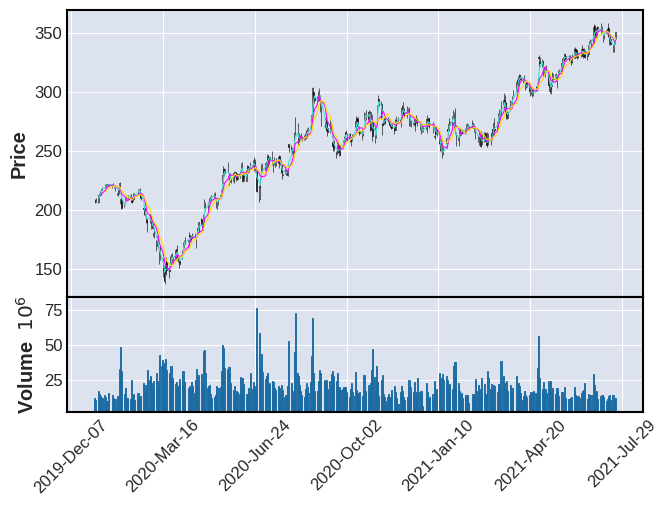

In [95]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [96]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

314

In [97]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.30420263],
       [0.29890759],
       [0.31765494],
       [0.31984924],
       [0.33015313],
       [0.34484569],
       [0.34370079],
       [0.36206651],
       [0.3484711 ],
       [0.35844103],
       [0.36139867],
       [0.36316366],
       [0.35982446],
       [0.35925204],
       [0.3518103 ],
       [0.34312837],
       [0.32848349],
       [0.34241278],
       [0.36836328],
       [0.30301006],
       [0.26666032],
       [0.27753662],
       [0.30444116],
       [0.30577684],
       [0.3093069 ],
       [0.31636694],
       [0.31984924],
       [0.29184755],
       [0.30887752],
       [0.32023088],
       [0.32519196],
       [0.34246053],
       [0.34098175],
       [0.32710013],
       [0.30611073],
       [0.26098364],
       [0.24214094],
       [0.24419214],
       [0.20865335],
       [0.22162859],
       [0.24056673],
       [0.19023995],
       [0.21824164],
       [0.18680532],
       [0.16734245],
       [0.11205459],
       [0.15350859],
       [0.115

In [98]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.30420263, 0.29890759, 0.31765494, 0.31984924, 0.33015313,
       0.34484569, 0.34370079, 0.36206651, 0.3484711 , 0.35844103,
       0.36139867, 0.36316366, 0.35982446, 0.35925204, 0.3518103 ,
       0.34312837, 0.32848349, 0.34241278, 0.36836328, 0.30301006,
       0.26666032, 0.27753662, 0.30444116, 0.30577684, 0.3093069 ,
       0.31636694, 0.31984924, 0.29184755, 0.30887752, 0.32023088,
       0.32519196, 0.34246053, 0.34098175, 0.32710013, 0.30611073,
       0.26098364, 0.24214094, 0.24419214, 0.20865335, 0.22162859,
       0.24056673, 0.19023995, 0.21824164, 0.18680532, 0.16734245,
       0.11205459, 0.15350859, 0.11558464, 0.04035685, 0.11577542,
       0.        , 0.01626677, 0.00453185, 0.03396465, 0.01774556,
       0.00997   , 0.07141153, 0.04865721, 0.08266947, 0.05142393])]
[0.09511997579324338]



In [99]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(254, 60, 1)

In [100]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [101]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [102]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

254/254 [==============================] - 9s 25ms/step - loss: 0.0140


In [104]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [105]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [106]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [107]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

8.43649644118089

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


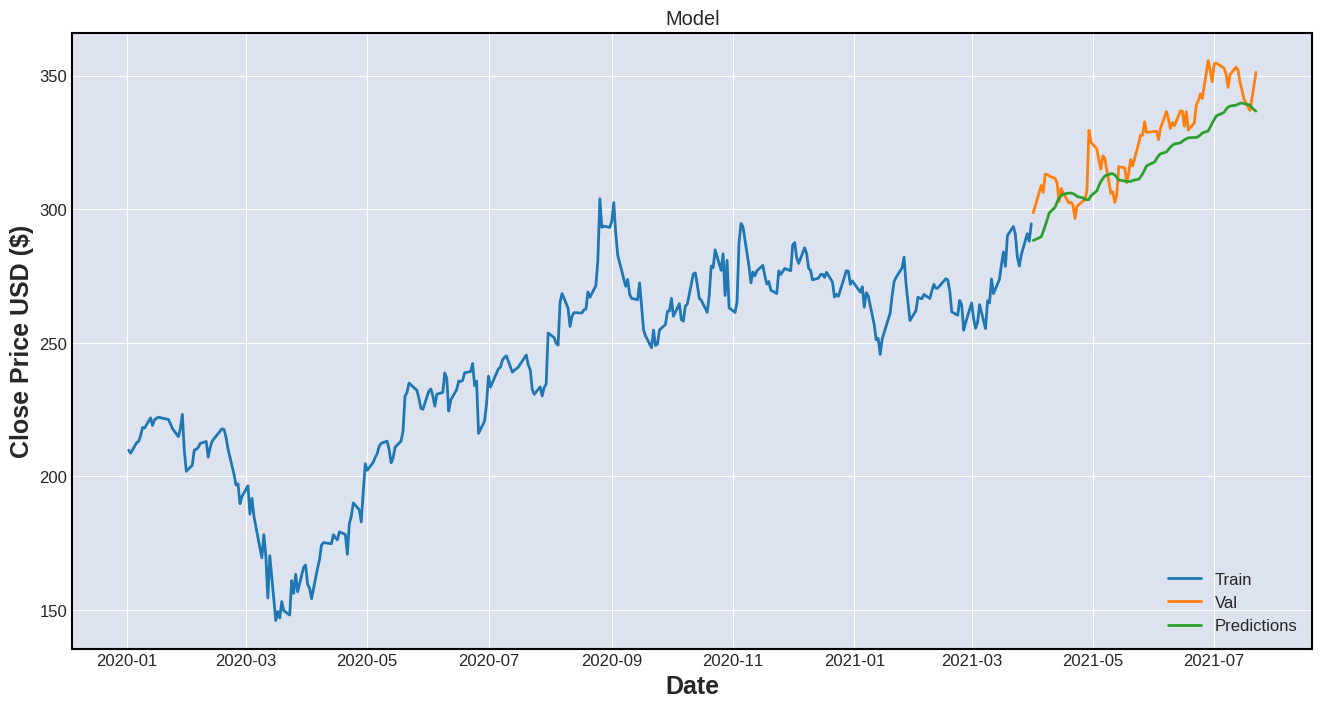

In [108]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [109]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-01,298.660004,288.307495
2021-04-05,308.910004,289.664032
2021-04-06,306.260010,291.652679
2021-04-07,313.089996,293.757507
2021-04-08,313.019989,296.147064
...,...,...
2021-07-16,341.160004,339.534149
2021-07-19,336.950012,338.984406
2021-07-20,341.660004,338.071167


In [111]:
#get the quote
apple_quote = yf.download('FB', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[336.68567]]
